In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
model = LinearRegression()

In [8]:
x = np.arange(0,100)
y = np.sin(x/10)+np.random.randint(low=-2, high=2, size = 100)/5+8

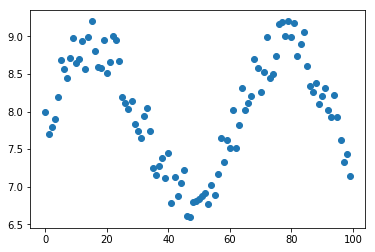

In [9]:
plt.scatter(x,y)

In [10]:
df = pd.DataFrame({
    "x":x,
    "y":y
})

In [11]:
df.head()

,x,y
0,0,8.000000
1,1,7.699833
2,2,7.798669
3,3,7.895520
4,4,8.189418


In [20]:
model.fit(df[['x']],df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
model.coef_

array([-0.00095914])

In [14]:
model.intercept_

8.089951450017244

In [15]:
pred = model.predict(pd.DataFrame({"x":np.arange(0,100,2)}))

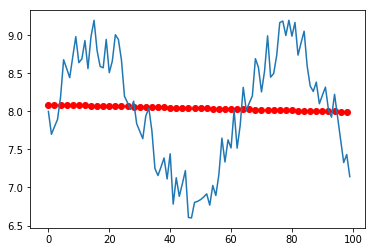

In [17]:
plt.plot(x,y)
plt.scatter(np.arange(0,100,2),pred,c='red')

In [21]:
df['x2'] = df['x']**2

In [22]:
df.head()

,x,y,x2
0,0,8.000000,0
1,1,7.699833,1
2,2,7.798669,4
3,3,7.895520,9
4,4,8.189418,16


In [23]:
model.fit(df[['x','x2']],df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(model.coef_,model.intercept_)

[-0.03939022  0.00038819] 8.717659063179024


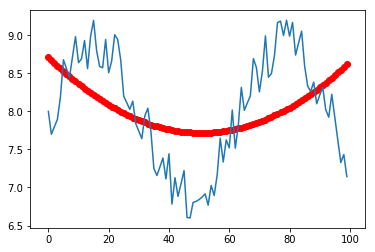

In [25]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df[['x','x2']]),c='red')

In [36]:
df['cosx'] = np.cos(df['x']/10)
df.head()

,x,y,x2,cosx
0,0,8.000000,0,1.000000
1,1,7.699833,1,0.995004
2,2,7.798669,4,0.980067
3,3,7.895520,9,0.955336
4,4,8.189418,16,0.921061


In [37]:
model.fit(df.drop('y',axis=1),df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print(model.coef_,model.intercept_)

[-0.03980067  0.00039826  0.10565731] 8.709699649228673


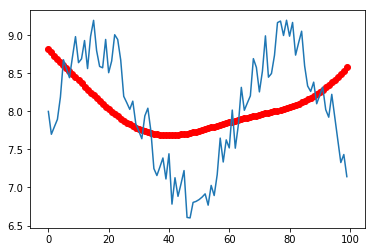

In [39]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df.drop('y',axis=1)),c='red')

In [40]:
df['sinx'] = np.sin(df['x']/10)
df.head()

,x,y,x2,cosx,sinx
0,0,8.000000,0,1.000000,0.000000
1,1,7.699833,1,0.995004,0.099833
2,2,7.798669,4,0.980067,0.198669
3,3,7.895520,9,0.955336,0.295520
4,4,8.189418,16,0.921061,0.389418


In [41]:
model.fit(df.drop('y',axis=1),df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print(model.coef_,model.intercept_)

[ 3.17240329e-03 -2.57252711e-05  2.91719698e-02  1.05939154e+00] 7.773677434908838


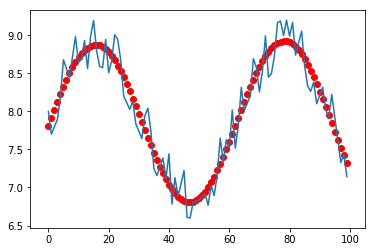

In [43]:
plt.plot(x,y)
plt.scatter(df['x'],model.predict(df.drop('y',axis=1)),c='red')

In [50]:
x = np.arange(0,100)
y = 2.5*np.sin(x/10)+np.random.randint(low=-2, high=2, size = 100)/5+8
df1 = pd.DataFrame({
    'x':x,
    'sinx':np.sin(x/10),
    'y':y
})

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(df1.drop('y',axis=1),df1['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
print(lm.coef_,lm.intercept_)

[2.96589838e-04 2.50816069e+00] 7.91979704598037


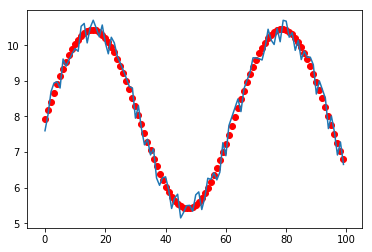

In [57]:
plt.plot(x,y)
plt.scatter(df1['x'],lm.predict(df1.drop('y',axis=1)),c='red')

# 3d plot

In [58]:
# z = 2*(x**2) + 3*xy + 4x + 5
x = np.arange(-50,50,5)
y = np.arange(-50,50,5)
x_ = []
y_ = []
z_ = []
for i in x:
    for j in y:
        x_.append(i)
        y_.append(j)
        z_.append(2 * (i**2) + 3 * i * j + 4 * i + 5)

In [59]:
df = pd.DataFrame({
    'x':x_,
    'y':y_,
    'z':z_
})
df.head()

,x,y,z
0,-50,-50,12305
1,-50,-45,11555
2,-50,-40,10805
3,-50,-35,10055
4,-50,-30,9305


In [60]:
from mpl_toolkits.mplot3d import Axes3D

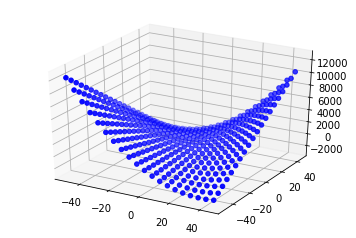

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue', marker='o')
plt.show()

In [65]:
lm = LinearRegression()
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[-13.5  -7.5] 1636.25


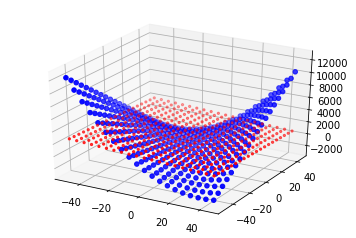

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue', marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [68]:
df['x2'] = df['x'] ** 2

In [70]:
df.head(3)

,x,y,z,x2
0,-50,-50,12305,2500
1,-50,-45,11555,2500
2,-50,-40,10805,2500


In [69]:
lm = LinearRegression()
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[-3.5 -7.5  2. ] -13.750000000000227


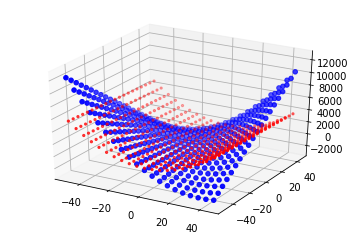

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue', marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [73]:
df['xy'] = df['x'] * df['y']
df.head(3)

,x,y,z,x2,xy
0,-50,-50,12305,2500,2500
1,-50,-45,11555,2500,2250
2,-50,-40,10805,2500,2000


In [74]:
lm = LinearRegression()
lm.fit(df.drop('z',axis=1),df['z'])
print(lm.coef_,lm.intercept_)

[4.00000000e+00 3.55271368e-14 2.00000000e+00 3.00000000e+00] 5.000000000001137


In [ ]:
# z = 2*(x**2) + 3*xy + 4x + 5

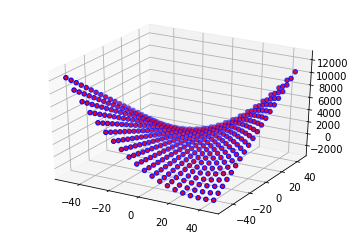

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['x'],df['y'],df['z'],c='blue', marker='o')
ax.scatter(df['x'],df['y'],lm.predict(df.drop('z',axis=1)),c='red',marker='.')
plt.show()

In [76]:
df.corr()

,x,y,z,x2,xy
x,1.000000,0.000000,-0.132635,-0.191040,-0.086066
y,0.000000,1.000000,-0.073686,0.000000,-0.086066
z,-0.132635,-0.073686,1.000000,0.520850,0.861231
x2,-0.191040,0.000000,0.520850,1.000000,0.016442
xy,-0.086066,-0.086066,0.861231,0.016442,1.000000
